# All material ©2019, Alex Siegman

---

### {quote on data viz}

### There are a lot of different tools for data visualization in Python. 

### {Matplotlib} 
### {Seaborn} 
### {Numpy}

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [221]:
data = pd.read_csv("SternTech_UserData.csv") # read in our csv 

In [222]:
data.head() # check the first five rows of our csv

,Unnamed: 0,id,company_size,age,sex,clicked_on_ad,ad_type,location,timestamp
0,0,081217b4-1cf5-4657-8287-6db1b75462e4,large,92,M,Yes,Business,MidWest,2018-08-26 06:00:27.124290
1,1,d0b45a01-b73d-4f8e-bfa8-c53ea75397f1,large,56,M,Yes,Culinary,SouthWest,2011-06-01 18:54:34.815634
2,2,1dc2e636-e19b-4d42-b228-df09cd009acb,large,20,F,No,Business,SouthEast,2013-07-16 00:24:47.888180
3,3,5d09d6d4-023e-4fa1-9559-89526679e885,large,55,F,Yes,Political,NorthWest,2010-06-25 12:13:51.369878
4,4,b69e54e3-fc89-4c0f-8bdb-280409db173e,medium,25,N,No,Tech,US,2010-09-22 07:53:12.454909


In [223]:
data = data.drop(data.columns[[0]],axis=1)

### An important note on grouping: 

In [224]:
data.groupby(['location']).groups.keys()

dict_keys(['Canada', 'Mexico', 'MidWest', 'NorthEast', 'NorthWest', 'SouthAmerica', 'SouthEast', 'SouthWest', 'US'])

In [225]:
data.groupby('location').first() # show us the first entry for each location

,id,company_size,age,sex,clicked_on_ad,ad_type,timestamp
location,,,,,,,
Canada,26753d01-eaf3-4906-a0e8-ec3364e336ab,large,87,N,Yes,Political,2018-08-07 01:14:12.732566
Mexico,e68c8268-aeee-4bbf-b097-9d3d0f7be367,startup,89,F,Yes,Tech,2011-02-03 04:28:16.388852
MidWest,081217b4-1cf5-4657-8287-6db1b75462e4,large,92,M,Yes,Business,2018-08-26 06:00:27.124290
NorthEast,346471ed-a4e7-46b3-9418-7dff84b50132,large,95,F,Yes,Culinary,2006-09-30 02:14:29.869183
NorthWest,5d09d6d4-023e-4fa1-9559-89526679e885,large,55,F,Yes,Political,2010-06-25 12:13:51.369878
SouthAmerica,ec5a6353-f816-4737-8fed-a8a620fe70c3,medium,39,N,No,Business,2015-08-26 08:07:55.115573
SouthEast,1dc2e636-e19b-4d42-b228-df09cd009acb,large,20,F,No,Business,2013-07-16 00:24:47.888180
SouthWest,d0b45a01-b73d-4f8e-bfa8-c53ea75397f1,large,56,M,Yes,Culinary,2011-06-01 18:54:34.815634
US,b69e54e3-fc89-4c0f-8bdb-280409db173e,medium,25,N,No,Tech,2010-09-22 07:53:12.454909


In [226]:
data.groupby('location')['age'].mean() # show us the mean age for each location 

# note that the result here is a Pandas Series – a one-dimensional array 
# think of a series as a single column in a data frame 

location
Canada          58.444503
Mexico          57.991047
MidWest         58.907493
NorthEast       58.884084
NorthWest       58.120070
SouthAmerica    58.431022
SouthEast       58.334727
SouthWest       58.101925
US              58.439169
Name: age, dtype: float64

In [227]:
# this, on the other hand, will produce Pandas DataFrame

data.groupby('location')[['age']].sum()

,age
location,
Canada,330153
Mexico,317385
MidWest,331767
NorthEast,328161
NorthWest,333028
SouthAmerica,326980
SouthEast,320841
SouthWest,316946
US,315104


## But what if we don't want to set a new index? 

In [228]:
data.groupby('location', as_index=False).agg({"age": "sum"})

,location,age
0,Canada,330153
1,Mexico,317385
2,MidWest,331767
3,NorthEast,328161
4,NorthWest,333028
5,SouthAmerica,326980
6,SouthEast,320841
7,SouthWest,316946
8,US,315104


In [229]:
click_data = data[data['clicked_on_ad'] == 'Yes'].groupby('location')['age'].sum()

In [230]:
click_data

location
Canada          167592
Mexico          161244
MidWest         165068
NorthEast       161467
NorthWest       168745
SouthAmerica    161199
SouthEast       163964
SouthWest       160529
US              152096
Name: age, dtype: int64

In [231]:
type(click_data)

pandas.core.series.Series

### Pandas has a built in .plotI() function, with lots of parameters:

https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c

### Barplots 

In [232]:
data.head()

,id,company_size,age,sex,clicked_on_ad,ad_type,location,timestamp
0,081217b4-1cf5-4657-8287-6db1b75462e4,large,92,M,Yes,Business,MidWest,2018-08-26 06:00:27.124290
1,d0b45a01-b73d-4f8e-bfa8-c53ea75397f1,large,56,M,Yes,Culinary,SouthWest,2011-06-01 18:54:34.815634
2,1dc2e636-e19b-4d42-b228-df09cd009acb,large,20,F,No,Business,SouthEast,2013-07-16 00:24:47.888180
3,5d09d6d4-023e-4fa1-9559-89526679e885,large,55,F,Yes,Political,NorthWest,2010-06-25 12:13:51.369878
4,b69e54e3-fc89-4c0f-8bdb-280409db173e,medium,25,N,No,Tech,US,2010-09-22 07:53:12.454909


In [233]:
type(data)

pandas.core.frame.DataFrame

In [234]:
print(data.index.name)

None


In [235]:
size_click = pd.crosstab(data['company_size'],data['clicked_on_ad'],margins=True,margins_name='Total')
size_click

clicked_on_ad,No,Yes,Total
company_size,,,
large,6196,6291,12487
medium,6359,6278,12637
small,6165,6216,12381
startup,6280,6215,12495
Total,25000,25000,50000


In [236]:
type(size_click)

pandas.core.frame.DataFrame

In [237]:
print(size_click.index.name)

company_size


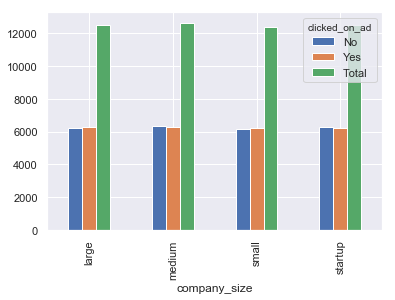

In [117]:
size_click[:4].plot(kind='bar')

In [238]:
sns.barplot(x='company_size',y='clicked_on_ad',data=size_click)

ValueError: Could not interpret input 'company_size'

In [243]:
size_click.reset_index(inplace=True)

In [244]:
size_click

clicked_on_ad,company_size,No,Yes,Total
0,large,6196,6291,12487
1,medium,6359,6278,12637
2,small,6165,6216,12381
3,startup,6280,6215,12495
4,Total,25000,25000,50000


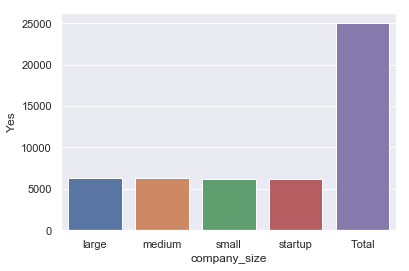

In [246]:
sns.barplot(x='company_size',y='Yes',data=size_click)

### Histograms

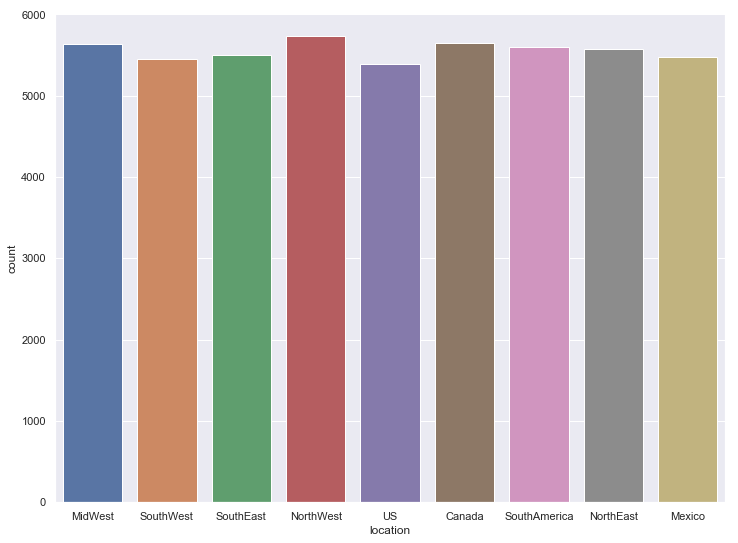

In [122]:
sns.set(rc={'figure.figsize':(12,9)})
sns.countplot(x='location',data=data)

### Scatterplot

In [111]:
# data['timestamp'] = pd.to_datetime(data['timestamp'],infer_datetime_format=True)
# data['timestamp'].map(lambda d: d.month).plot(kind='hist')

### Density Plot

### Boxplot

### Hexagonal Bin Plot

### Trellis Plot

### Heatmaps

In [ ]:
# size_sex_click = pd.crosstab(data.clicked_on_ad,[data.company_size,data.sex],margins=True,margins_name='Total')
# size_sex_click